FAKE NOTES PREDICTION
---
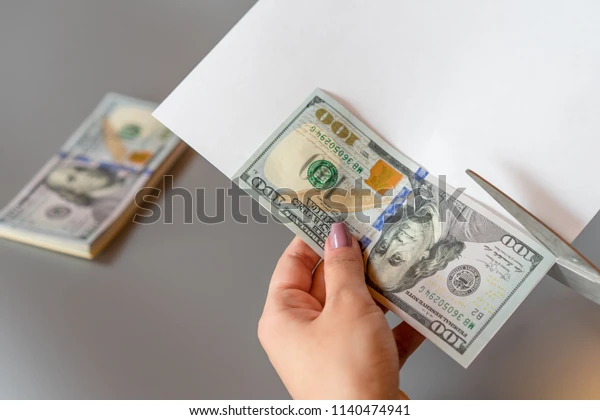

BY: PRECIOUS EBITE AZUN

Importing essential libraries needed
---

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(10, 10)
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

Let's view our data
---

In [175]:
notes=pd.read_csv('bank_notes.csv')
notes.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [176]:
notes.tail()

,variance,skewness,curtosis,entropy,Target
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [177]:
print(notes.shape)
print(notes.describe())
notes.info()

(1372, 5)
          variance     skewness     curtosis      entropy       Target
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target

MIssing Values, duplicates etc
---
It's important that we always check for missing values, duplicates etc to ensure we don't have a high bias or variance in our end result...


In [178]:
notes.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
Target      0
dtype: int64

In [179]:
notes.duplicated().sum()

24

In [180]:
notes.drop_duplicates(keep=False, inplace=True)
notes.duplicated().sum()

0

Exploratory Data Analysis
---
Now let us visualize our data to see exactly how everything looks and have general sense of it

<function matplotlib.pyplot.show(close=None, block=None)>

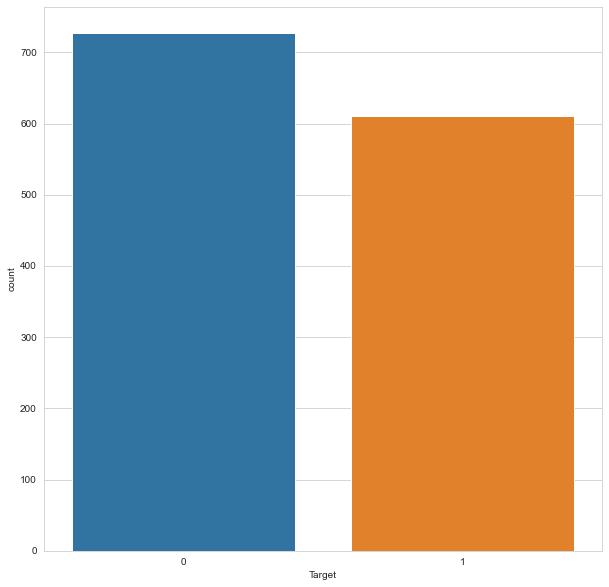

In [181]:
sns.countplot(x='Target',data=notes)
plt.show

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>],
       [<AxesSubplot:title={'center':'curtosis'}>,
        <AxesSubplot:title={'center':'entropy'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>]],
      dtype=object)

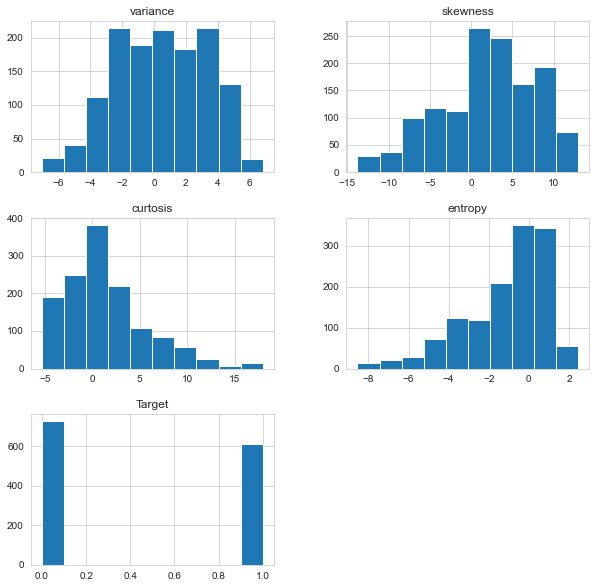

In [182]:
notes.hist()

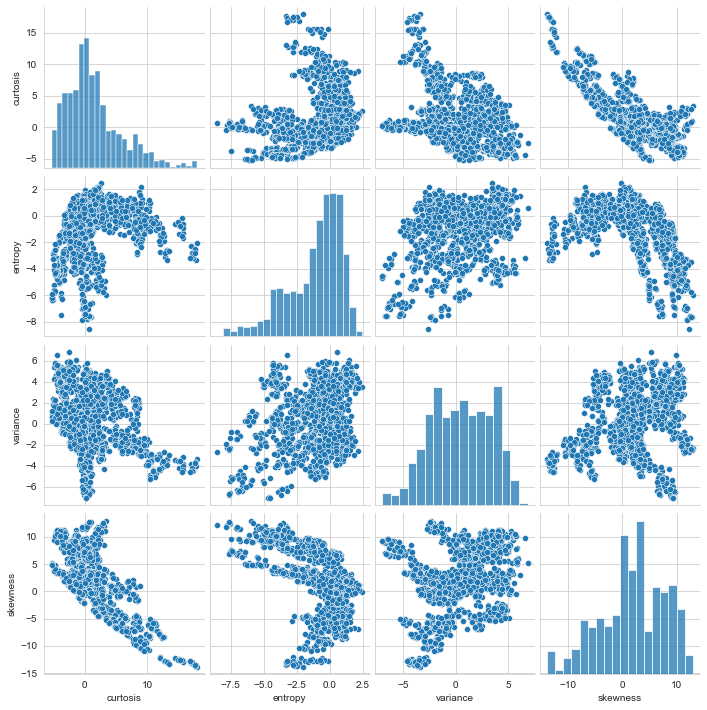

In [183]:
view = ['curtosis','entropy','variance','skewness']
sns.pairplot(notes[view])

Partitioning
---
It is very IMPORTANT we partition our data before Normalizing it and this is done to avoid Data Leakage. So here we are trying to seperate the Target from the features that could lead to the fake notes. Also, we are going to split it into a TRAINING AND TESTING SET.

That's right! we have to test with data we have and see if our algorithm turns out well.

In [184]:
X = notes.drop(labels='Target', axis=1)
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [185]:
Y = notes['Target']
Y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Target, Length: 1337, dtype: int64

I'm taking out 30%==0.3 as the testing set and 70 for training. Random and shuffling? Oh yes, lets do this to see if it can clearly predict right!
---

In [186]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42, shuffle=True)
X_train

,variance,skewness,curtosis,entropy
146,3.85840,0.78425,1.10330,1.70080
405,0.58982,7.42660,1.23530,-2.95950
310,4.02150,-2.70040,2.49570,0.36636
1124,-1.75890,-6.46240,8.47730,0.31981
927,-3.62270,3.99580,-0.35845,-3.90470
...,...,...,...,...
1130,-2.29180,-7.25700,7.95970,0.92110
1165,-3.80530,2.42730,0.68090,-1.08710
1329,-2.96720,-13.28690,13.47270,-2.62710
895,-0.63298,-5.12770,4.56240,1.47970


In [187]:
Y_train

146     0
405     0
310     0
1124    1
927     1
       ..
1130    1
1165    1
1329    1
895     1
1161    1
Name: Target, Length: 935, dtype: int64

In [188]:
X_test

,variance,skewness,curtosis,entropy
934,-1.61760,1.09260,-0.35502,-0.59958
1098,-1.80460,-6.81410,6.70190,1.16810
1290,0.11032,1.97410,-3.36680,-0.65259
317,2.67180,5.65740,0.72974,-1.48920
252,0.57340,9.19380,-0.90940,-1.87200
...,...,...,...,...
694,0.74054,0.36625,2.19920,0.48403
1137,-1.58770,-6.60720,5.80220,0.31593
1367,0.40614,1.34920,-1.45010,-0.55949
355,-0.21661,8.03290,1.88480,-3.88530


In [189]:
Y_test

934     1
1098    1
1290    1
317     0
252     0
       ..
694     0
1137    1
1367    1
355     0
378     0
Name: Target, Length: 402, dtype: int64

In [190]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((935, 4), (402, 4), (935,), (402,))

Normalization
---
We are scaling this data to avoid fluctuation/variance when we start traing and testing. We want exact results

In [191]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)
X_train_std

array([[ 1.1769568 , -0.1621525 , -0.09816497,  1.37256066],
       [ 0.05419627,  0.96867015, -0.0682651 , -0.89173112],
       [ 1.23298181, -0.75539452,  0.21723341,  0.72419864],
       ...,
       [-1.16764369, -2.55768648,  2.70367983, -0.73022851],
       [-0.36583676, -1.16862867,  0.68537031,  1.26513519],
       [ 0.09372637, -0.26642888, -0.75260981,  0.7216867 ]])

Algorithms Implementation
---

LogisticRegression

In [192]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [193]:
Y_pred=lr.predict(X_test_std)
from sklearn.metrics import accuracy_score

In [194]:
ac_lr=accuracy_score(Y_test,Y_pred)

Now let's see if our predictions are right
---

In [195]:
Y_test

934     1
1098    1
1290    1
317     0
252     0
       ..
694     0
1137    1
1367    1
355     0
378     0
Name: Target, Length: 402, dtype: int64

In [196]:
Y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [197]:
ac_lr

0.9925373134328358

Looking up we can see that the first and last 5 values in our Y_test corresponds to that in the Y_predict. Hence, we did GREAT!
---

Another Algorithm Implementation
---

DecisionTree

In [198]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [199]:
Y_pred=dt.predict(X_test_std)
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(Y_test,Y_pred)

In [200]:
dt.feature_importances_

array([0.6364734 , 0.24038244, 0.11294887, 0.01019529])

In [201]:
X_train.columns

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

Lets see which of the features is more important for predicting the fake notes
---

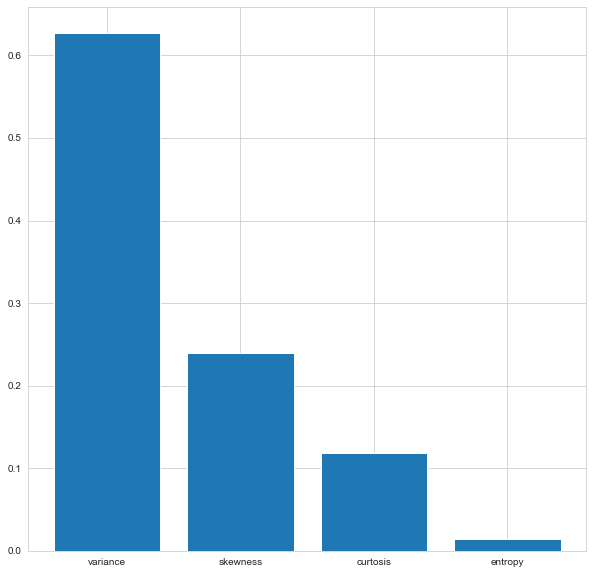

In [202]:
plt.bar(['variance', 'skewness', 'curtosis', 'entropy'],[0.62698291, 0.23999222, 0.11816811, 0.01485675])
plt.show()

In [203]:
ac_dt

0.9825870646766169

Finally, the LogisticRegression gave us the highest accuracy of 99.25%
---

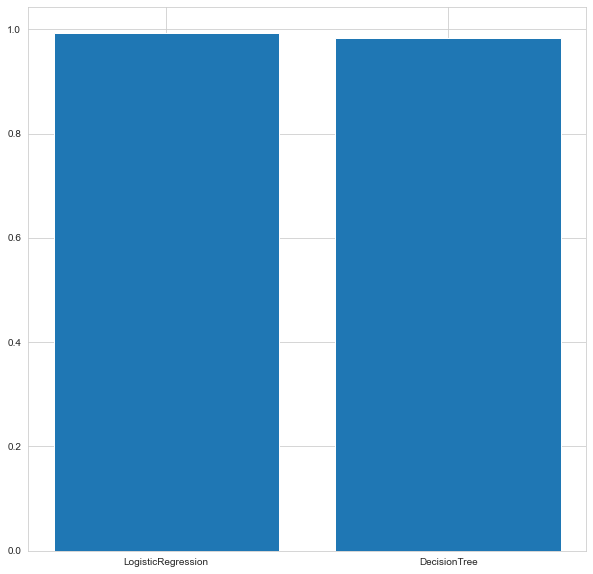

In [205]:
plt.bar(['LogisticRegression','DecisionTree'],[ac_lr,ac_dt])
plt.show()

Thank you for joining me!!!!!!
---